In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [3]:
START_DATE = '2016-01-01'
END_DATE = '2024-5-29'
ASSET = ['AAPL','TSLA', 'MSFT',"NVDA","GOOGL","AMZN","META"]
prices_df = yf.download(ASSET,start = START_DATE,end = END_DATE)
print(f'Downloaded {prices_df.shape[0]} rows of data.')
prices_df.head()

[*********************100%%**********************]  7 of 7 completed

Downloaded 2114 rows of data.


Price       Adj Close                                                         \
Ticker           AAPL       AMZN      GOOGL        META       MSFT      NVDA   
Date                                                                           
2016-01-04  23.914484  31.849501  37.972000  102.111656  48.521469  7.899905   
2016-01-05  23.315205  31.689501  38.076500  102.621124  48.742840  8.026812   
2016-01-06  22.858932  31.632500  37.966499  102.860863  47.857407  7.694906   
2016-01-07  21.894178  30.396999  37.049999   97.816216  46.192799  7.389841   
2016-01-08  22.009949  30.352501  36.545502   97.226845  46.334480  7.231209   

Price                      Close                        ...       Open  \
Ticker           TSLA       AAPL       AMZN      GOOGL  ...       MSFT   
Date                                                    ...              
2016-01-04  14.894000  26.337500  31.849501  37.972000  ...  54.320000   
2016-01-05  14.895333  25.677500  31.689501  38.076500  ...  54.930000   
2016-01-06  14.602667  25.174999  31.632500  37.966499  ...  54.320000   
2016-01-07  14.376667  24.112499  30.396999  37.049999  ...  52.700001   
2016-01-08  14.066667  24.240000  30.352501  36.545502  ...  52.369999   

Price                             Volume                                 \
Ticker        NVDA       TSLA       AAPL       AMZN     GOOGL      META   
Date                                                                      
2016-01-04  8.0725  15.381333  270597600  186290000  67382000  37912400   
2016-01-05  8.2450  15.090667  223164000  116452000  45216000  23258200   
2016-01-06  8.0875  14.666667  273829600  106584000  48206000  25096200   
2016-01-07  7.6850  14.279333  324377600  141498000  63132000  45172900   
2016-01-08  7.6675  14.524000  283192000  110258000  47506000  35402300   

Price                                      
Ticker          MSFT      NVDA       TSLA  
Date                                       
2016-01-04  53778000  35807600  102406500  
2016-01-05  34079700  49027200   47802000  
2016-01-06  39518900  44934400   56686500  
2016-01-07  56564900  64530400   53314500  
2016-01-08  48754000  39847200   54421500  

[5 rows x 42 columns]

In [4]:
big_7_returns = prices_df['Adj Close'].pct_change().dropna()

aapl_returns = big_7_returns['AAPL']
q_low = aapl_returns.quantile(0.01)
q_high = aapl_returns.quantile(0.99)
aapl_returns_filtered = aapl_returns[(aapl_returns > q_low) & (aapl_returns < q_high)]
aapl_returns.head()

Date
2016-01-05   -0.025059
2016-01-06   -0.019570
2016-01-07   -0.042205
2016-01-08    0.005288
2016-01-11    0.016192
Name: AAPL, dtype: float64

In [5]:
model_arima = pm.auto_arima(aapl_returns_filtered, start_p=1, start_q=1, max_p=5, max_q=5, seasonal=False, d=1,
                            trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

fc_arima, confint_arima = model_arima.predict(n_periods=len(aapl_returns) + 12 * 4, return_conf_int=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9981.759, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10544.215, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9983.758, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-10810.441, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-10990.716, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-11069.946, Time=0.58 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-11123.192, Time=0.63 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-11266.405, Time=1.81 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-11302.815, Time=1.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-11329.925, Time=1.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-11289.859, Time=0.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-11355.283, Time=1.30 sec
 ARIMA(2,1,2)(0,0,0)[

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [6]:
model_sarimax = SARIMAX(aapl_returns_filtered, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
results_sarimax = model_sarimax.fit()
fc_sarimax = results_sarimax.forecast(steps=len(aapl_returns) + 12 * 4)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.52875D+00    |proj g|=  1.73131D+01


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -2.58546D+00    |proj g|=  1.05668D+00

At iterate   10    f= -2.61407D+00    |proj g|=  1.19659D+01

At iterate   15    f= -2.64604D+00    |proj g|=  2.05378D-01

At iterate   20    f= -2.65054D+00    |proj g|=  6.24783D+00

At iterate   25    f= -2.69004D+00    |proj g|=  5.23739D+00

At iterate   30    f= -2.69336D+00    |proj g|=  5.82678D-01

At iterate   35    f= -2.70679D+00    |proj g|=  3.55996D+00

At iterate   40    f= -2.72461D+00    |proj g|=  1.90788D+00

At iterate   45    f= -2.72739D+00    |proj g|=  2.52531D-01

At iterate   50    f= -2.72740D+00    |proj g|=  3.45173D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [7]:
mse_arima = mean_squared_error(aapl_returns, fc_arima[:len(aapl_returns)])
mse_sarimax = mean_squared_error(aapl_returns, fc_sarimax[:len(aapl_returns)])
print(f'MSE for ARIMA: {mse_arima}')
print(f'MSE for SARIMAX: {mse_sarimax}')

MSE for ARIMA: 0.0003352399218753582
MSE for SARIMAX: 0.00033784010498738137


In [8]:
if mse_arima < mse_sarimax:
    selected_model = model_arima
    fc_final, confint_final = selected_model.predict(n_periods=12 * 10, return_conf_int=True)
else:
    selected_model = results_sarimax
    forecast_result = selected_model.get_forecast(steps=12 * 10)
    fc_final = forecast_result.predicted_mean
    confint_final = forecast_result.conf_int()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [9]:
fc_final, confint_final = selected_model.predict(n_periods=12 * 10, return_conf_int=True)
future_dates = pd.date_range(start=END_DATE, periods=12 * 10, freq='M')
assert len(future_dates) == len(fc_final)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


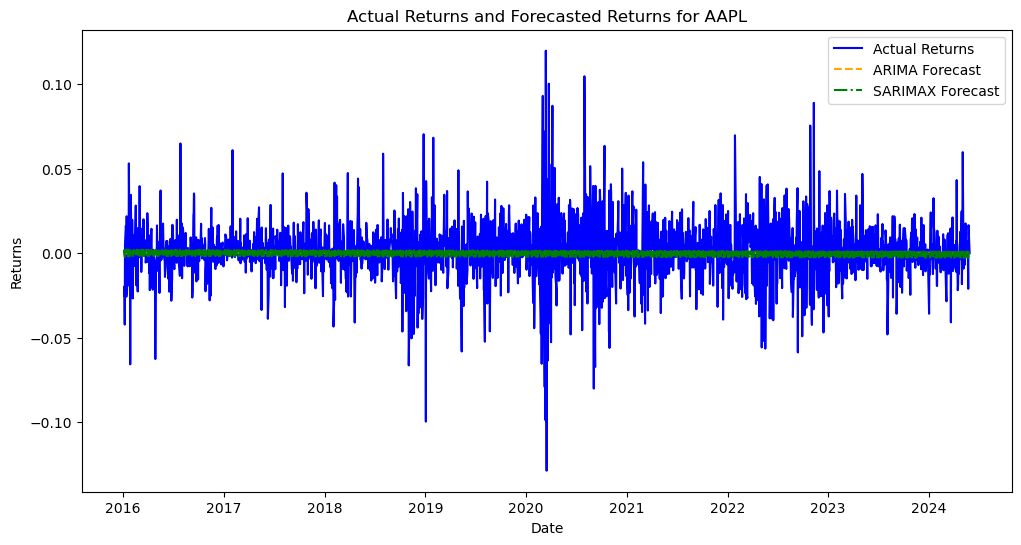

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(aapl_returns.index, aapl_returns, label='Actual Returns', color='blue')
plt.plot(aapl_returns.index, fc_arima[:len(aapl_returns)], label='ARIMA Forecast', color='orange', linestyle='--')
plt.plot(aapl_returns.index, fc_sarimax[:len(aapl_returns)], label='SARIMAX Forecast', color='green', linestyle='-.')
plt.title('Actual Returns and Forecasted Returns for AAPL')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()